In [ ]:
!curl -L "https://universe.roboflow.com/ds/UwRWuJ6meJ?key=9Ytt6R7aRg" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [2]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="Gk2vpxxHmGW3wNdTKIXP")
# project = rf.workspace("buildx").project("weapon-detection-7kro8")
# version = project.version(2)
# dataset = version.download("yolov8")


In [3]:
# editing pathes in data.yaml file (make new file)

data = '''
train: /kaggle/working/train/images
val: /kaggle/working/valid/images
test: /kaggle/working/test/images

nc: 14
names: ['Knife', 'ak', 'ax', 'cleaver', 'cutter', 'eto', 'long sword', 'm16', 'revolver', 'rifle', 'semi automatic', 'short sword', 'shotgun', 'spear']

roboflow:
  workspace: buildx
  project: weapon-detection-7kro8
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/buildx/weapon-detection-7kro8/dataset/2
  '''

with open('data.yaml', 'w') as file:
    file.write(data)

In [ ]:
!pip install ultralytics

In [5]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [6]:
# Train YOLOv8 on data

!yolo task=detect mode=train data=/kaggle/working/data.yaml model=yolov8s.pt epochs=20 imgsz=640 batch=16 augment=True

100%|██████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 56.3MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=

In [7]:
from IPython.display import Image, display

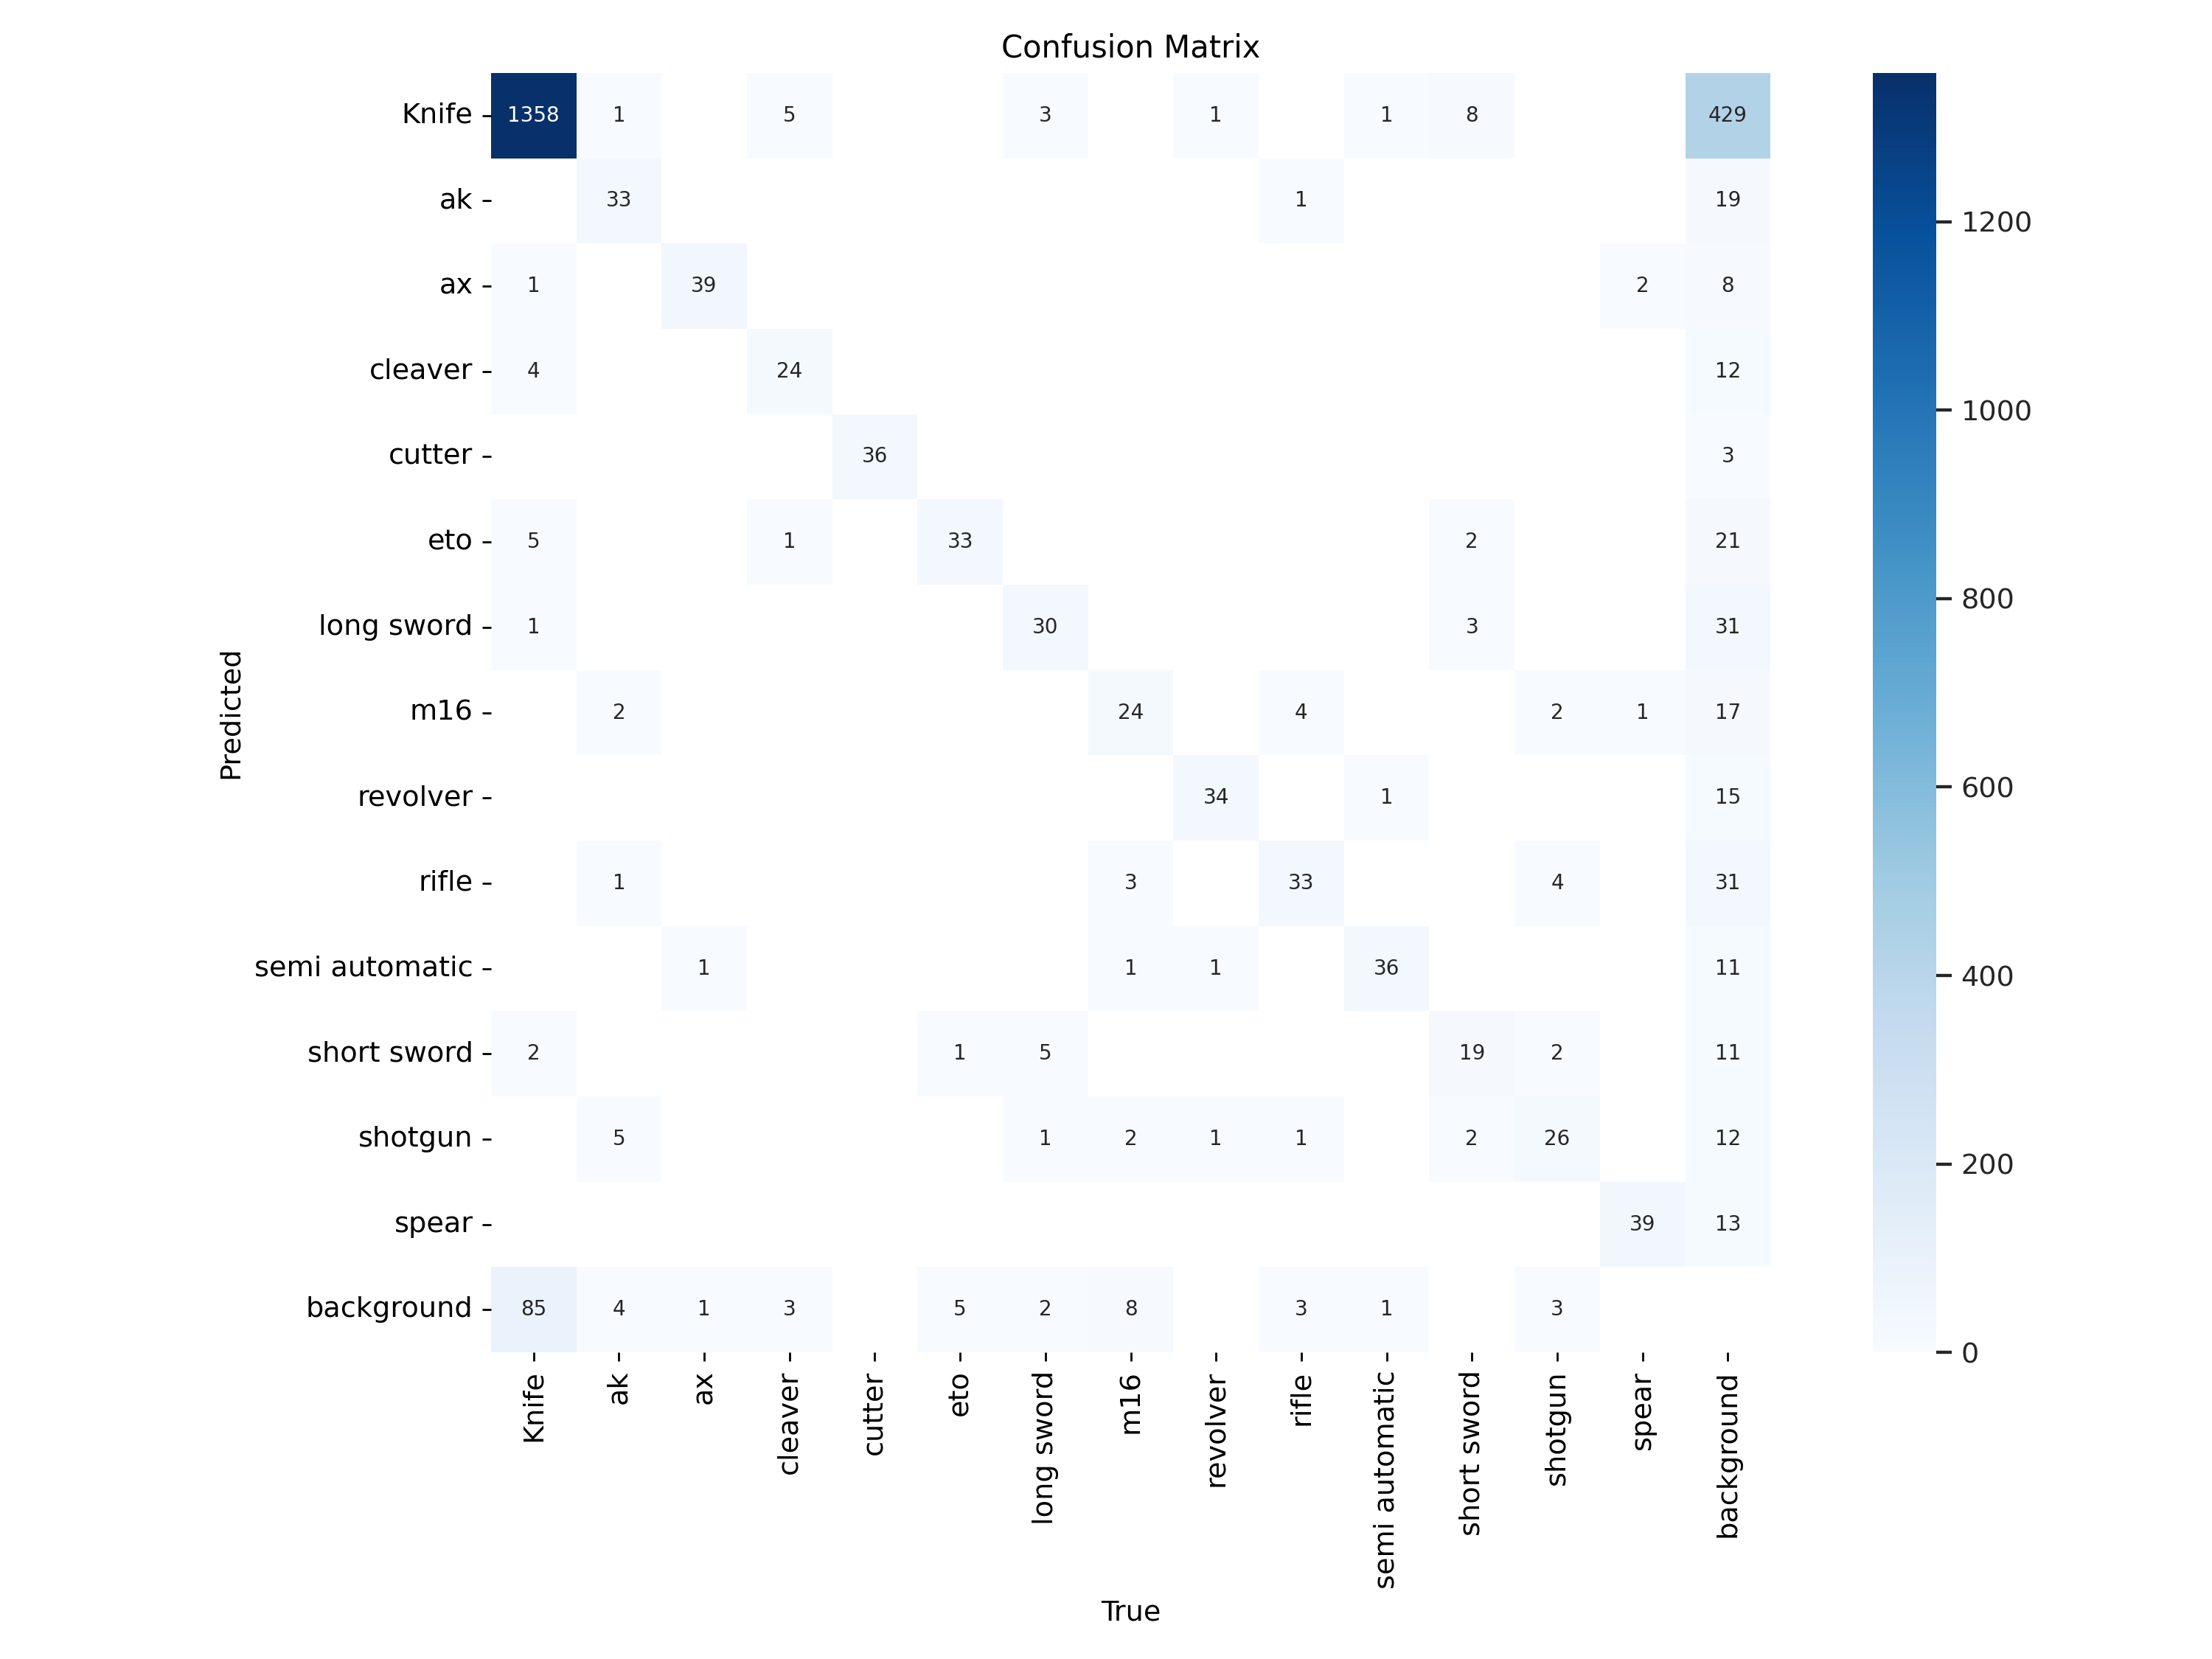

In [8]:
display(Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix.png", width=1000))

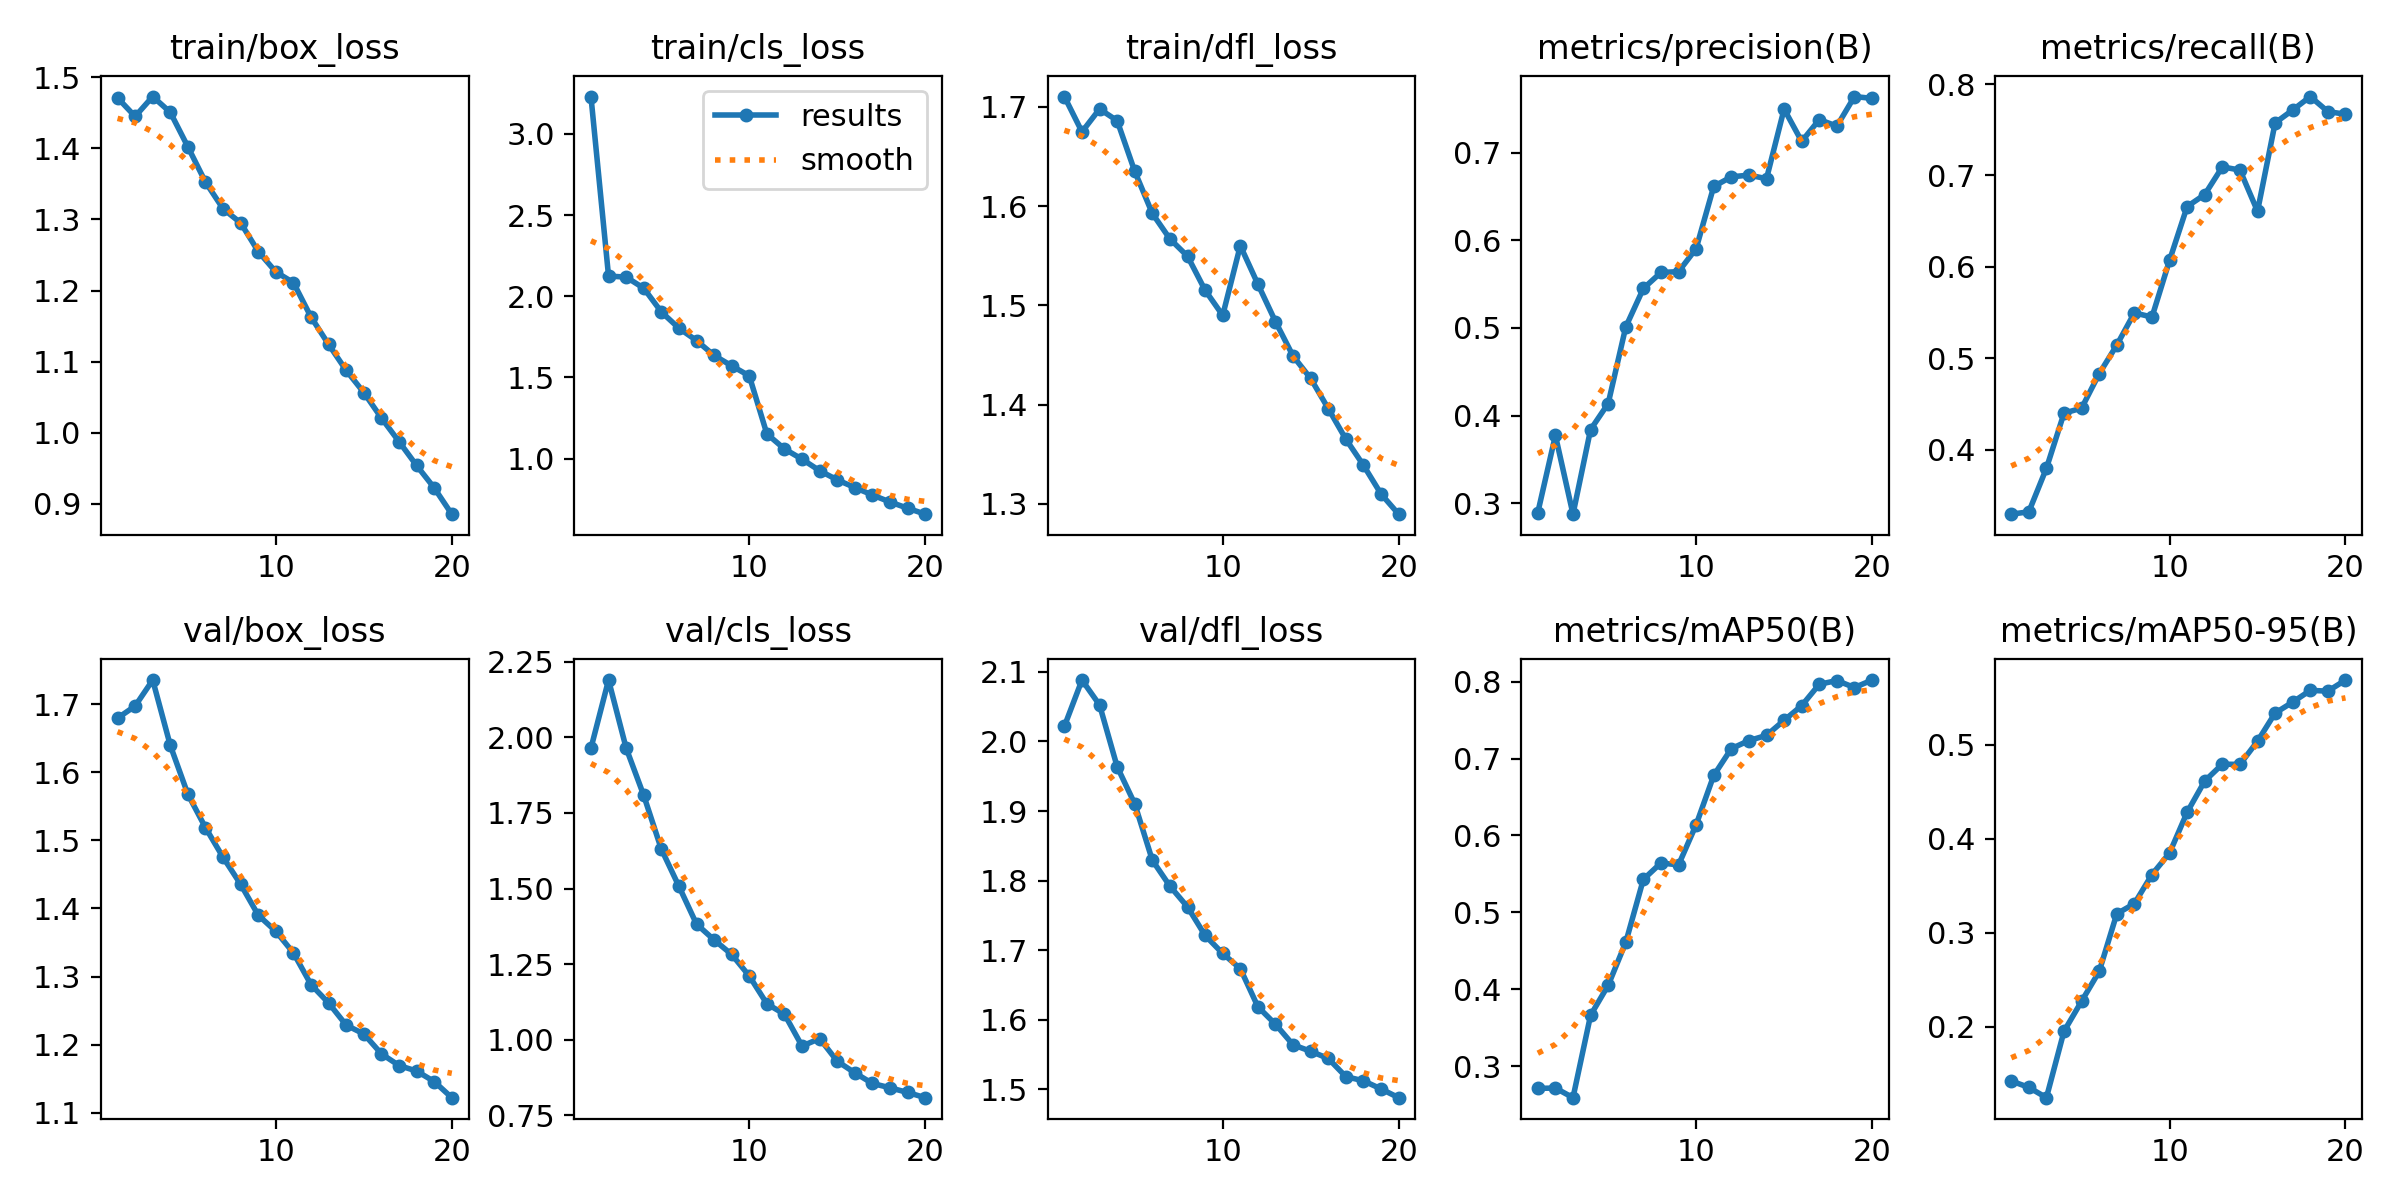

In [9]:
display(Image(filename=f"/kaggle/working/runs/detect/train/results.png", width=1000))

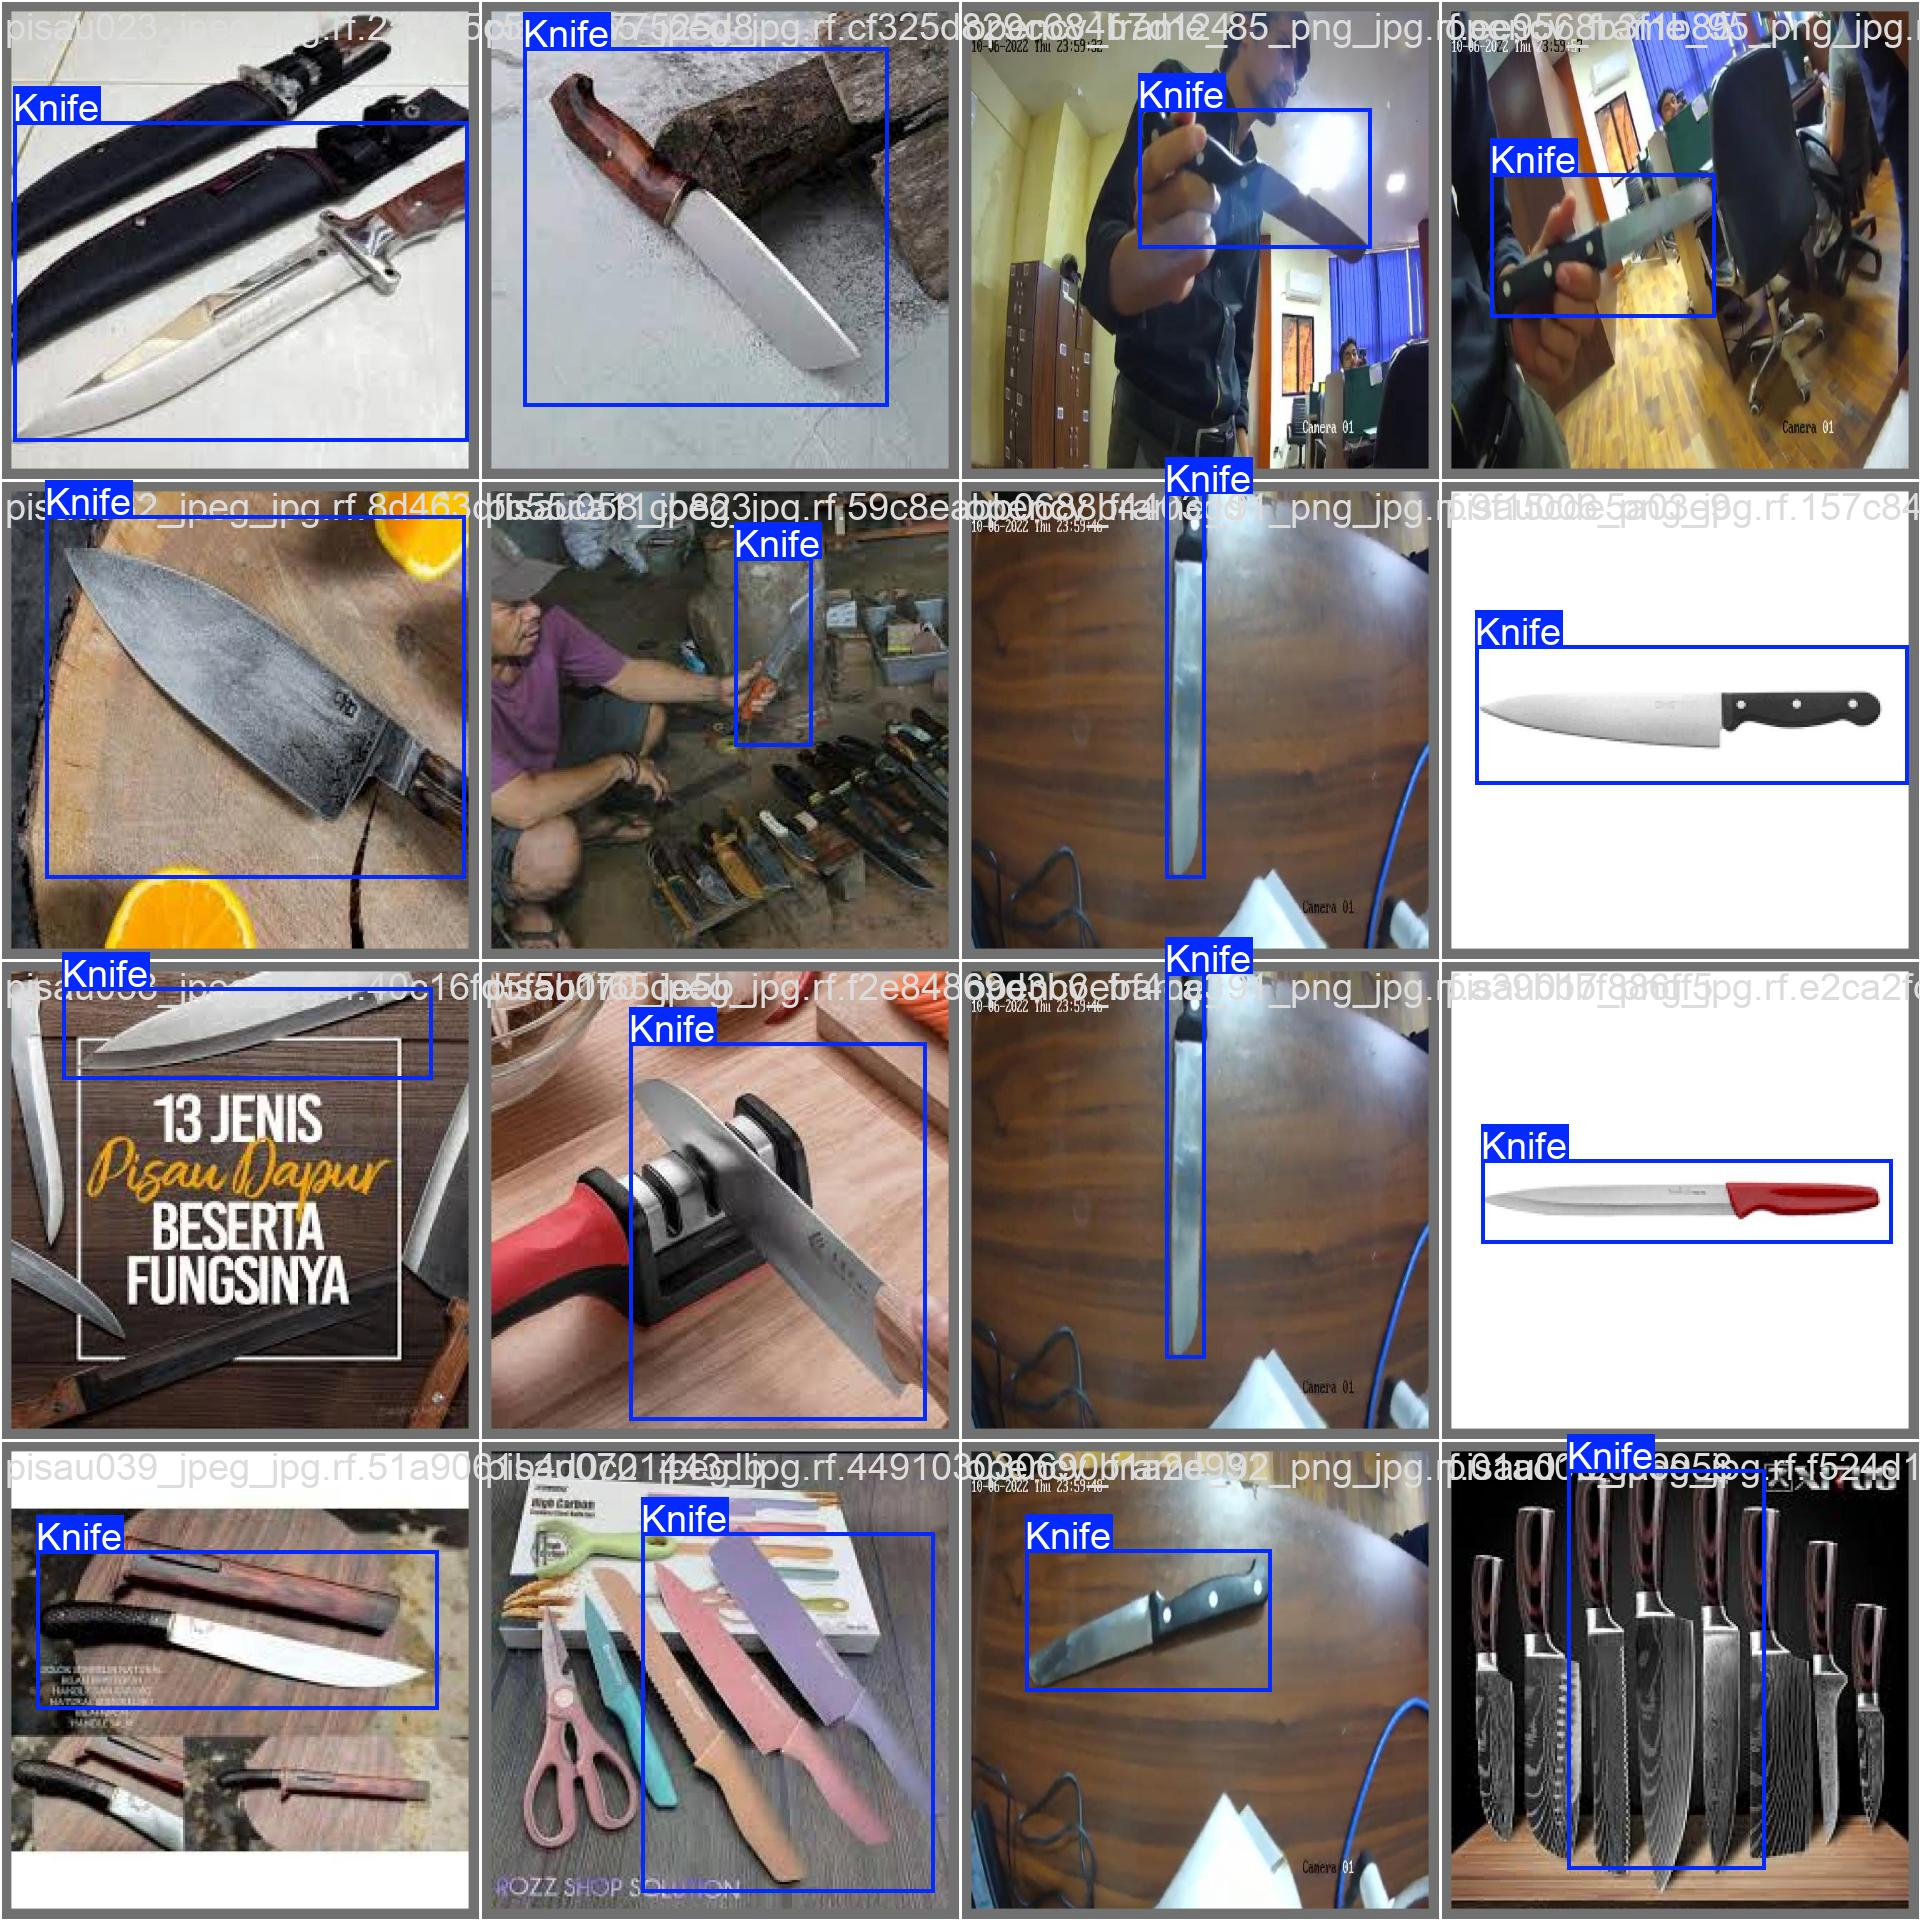

In [15]:
display(Image(filename=f"/kaggle/working/runs/detect/train/val_batch0_labels.jpg", width=1000))

In [11]:
# predict
!yolo task=detect mode=predict  model=/kaggle/working/runs/detect/train/weights/best.pt \
imgsz=640 conf=0.5 source=/kaggle/working/test/images

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,131,002 parameters, 0 gradients, 28.5 GFLOPs

image 1/983 /kaggle/working/test/images/09QGEI62WX5A_jpg.rf.dce6620da5d17b3e52e0324905dabd6d.jpg: 640x640 1 Knife, 7.9ms
image 2/983 /kaggle/working/test/images/0GXLS8TXBIBY_jpg.rf.b7aa92276858d82f63f2e64d641547f2.jpg: 640x640 1 Knife, 7.9ms
image 3/983 /kaggle/working/test/images/0Y7VH7ZMLYN7_jpg.rf.be0c613f9d6c75d5cfc9a8fbbc565fa9.jpg: 640x640 1 Knife, 7.7ms
image 4/983 /kaggle/working/test/images/10027_bmp_jpg.rf.0ed5d6c1c7fbc41a87e50c018654e0c8.jpg: 640x640 (no detections), 7.7ms
image 5/983 /kaggle/working/test/images/10040_bmp_jpg.rf.8490c3b98e5de5d7140a59567a243c9d.jpg: 640x640 1 Knife, 7.7ms
image 6/983 /kaggle/working/test/images/10045_bmp_jpg.rf.3165f7c4f229e21a933db9b525e32dea.jpg: 640x640 1 Knife, 7.5ms
image 7/983 /kaggle/working/test/images/10082_bmp_jpg.rf.b45d4f382168d60ab0fbab16b3d8cc7f.jpg: 640x640 

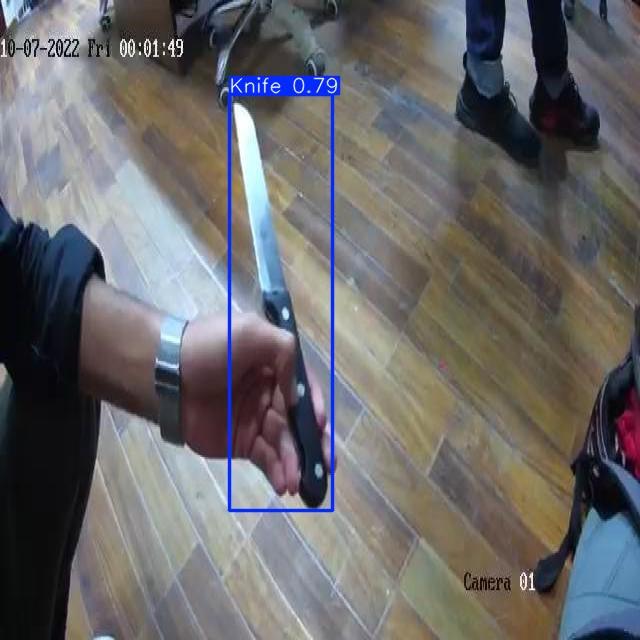

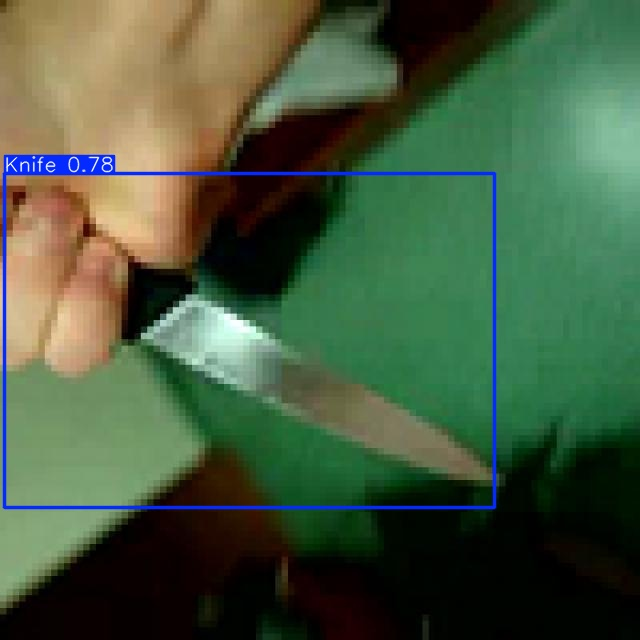

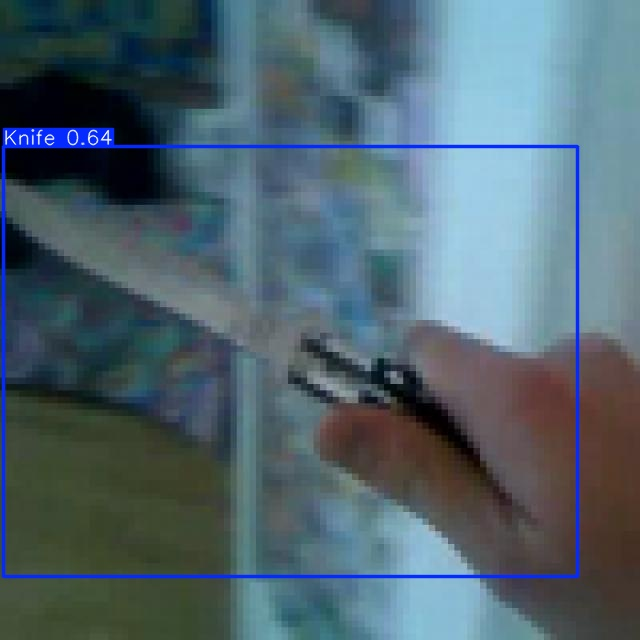

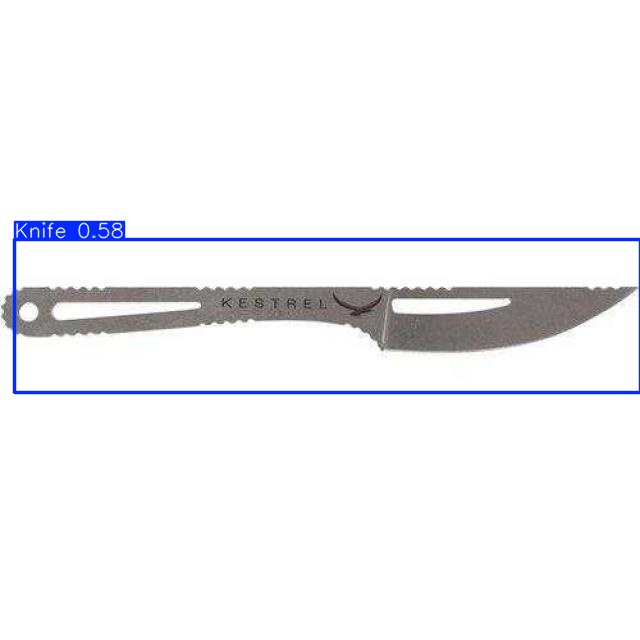

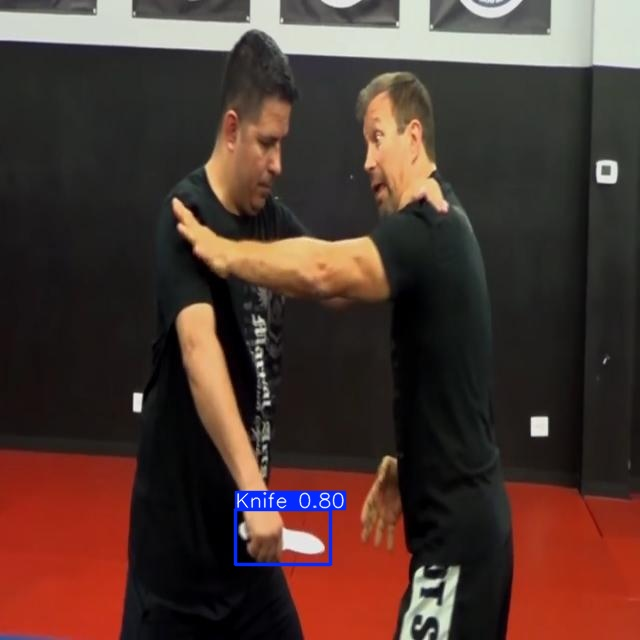

In [20]:
import glob

for imgname in glob.glob("/kaggle/working/runs/detect/predict/*.jpg")[25:30]:
    display(Image(filename=imgname))

In [38]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import glob

def predict_and_display_image(model_path, image_filename, test_images_dir="/kaggle/working/test/images", predictions_dir="/kaggle/working/runs/detect"):

    # Construct the full path to the test image
    testing_path = f"{test_images_dir}/{image_filename}"

    # Load the model and make predictions
    model = YOLO(model_path)
    results = model.predict(source=testing_path, save=True)

    # Search for the prediction file with the specified image name
    saved_images = glob.glob(f"{predictions_dir}/predict*/{image_filename}")
    if saved_images:
        result_image_path = saved_images[-1]  # Use the latest prediction result
        print(f"Result image path: {result_image_path}")
    else:
        print("Error: No saved image found.")
        return

    # Load and display the result image
    result_image = cv2.imread(result_image_path)
    if result_image is not None:
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()
    else:
        print("Error: Unable to load the image. Check the path.")




image 1/1 /kaggle/working/test/images/A01-013_jpg.rf.0645823d6692c2a86ae531e44df5fd97.jpg: 640x640 1 revolver, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict19
Result image path: /kaggle/working/runs/detect/predict17/A01-013_jpg.rf.0645823d6692c2a86ae531e44df5fd97.jpg


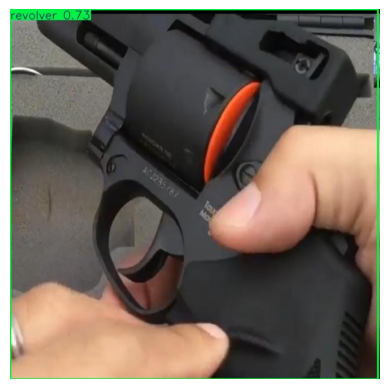

In [47]:
model_path = "/kaggle/working/runs/detect/train/weights/best.pt"

# image_filename = "open132_png_jpg.rf.1ff54e21da7ecb011375c7ebd4d57d5f.jpg" # knife true
image_filename = "A01-013_jpg.rf.0645823d6692c2a86ae531e44df5fd97.jpg" # revolver true
# image_filename = "6M8JVDAA0XNT_jpg.rf.6b5915b2bc2414cdbdc67d38ccf86419.jpg"
# image_filename = "KravMagaTraining21027_jpg.rf.87995d9716ff20edc36708295bb2137b.jpg"
# image_filename = "knife-833-_jpg.rf.73e5a199befa0a56ff6b8e15b3bc0a7b.jpg" #2 knifes but false

predict_and_display_image(model_path, image_filename)


In [18]:
import os
import yaml
from collections import defaultdict

# Define paths
train_label_path = '/kaggle/working/train/labels'
test_label_path = '/kaggle/working/test/labels'
data_yaml_path = '/kaggle/working/data.yaml'  # Path to data.yaml file

# Load class names from data.yaml
with open(data_yaml_path, 'r') as file:
    data_config = yaml.safe_load(file)
    class_names = data_config['names']  # This should be a dictionary like {0: 'class_name_1', 1: 'class_name_2'}

# Initialize dictionary to count images for each class by name
class_image_count = defaultdict(int)

# Function to count images per class in a specified label directory
def count_images_per_class(label_path):
    for label_file in os.listdir(label_path):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_path, label_file), 'r') as file:
                classes_in_image = set()  # Track unique classes in this image
                for line in file:
                    class_id = int(line.split()[0])
                    classes_in_image.add(class_id)
                for class_id in classes_in_image:
                    class_name = class_names[class_id]  # Map class ID to name
                    class_image_count[class_name] += 1

# Count images per class in both train and test label directories
count_images_per_class(train_label_path)
count_images_per_class(test_label_path)

# Display the count of images for each class by name
for class_name, count in class_image_count.items():
    print(f"Class '{class_name}': {count} images")


Class 'ak': 165 images
Class 'revolver': 156 images
Class 'Knife': 5683 images
Class 'ax': 157 images
Class 'shotgun': 118 images
Class 'spear': 149 images
Class 'eto': 143 images
Class 'semi automatic': 157 images
Class 'rifle': 160 images
Class 'short sword': 123 images
Class 'cleaver': 140 images
Class 'm16': 161 images
Class 'cutter': 148 images
Class 'long sword': 142 images


class imbalance found for class "knife"